In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento do Dataset 

In [15]:
# Carregamento do dataset
df_sensores = pd.read_csv('../dataset/sensores.csv')

In [3]:
# Mostrar 5 primeiros registros do Dataframe
df_sensores.head(5)

,Classe,ID,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,4,1,-0.032906,-0.037456,-0.034082,-0.001968,0.084229,0.156574,0.128887,0.042514,...,-0.036180,-0.099786,-0.080654,-0.070954,-0.003636,0.012660,0.028986,0.008340,0.065012,0.091692
1,1,1,0.198619,0.178949,0.072092,0.083383,0.151363,0.108910,-0.099102,-0.195660,...,-0.306607,-0.135897,-0.024512,0.103591,0.168580,0.032522,0.117073,0.001361,0.060746,0.093414
2,1,1,-0.000792,0.012913,0.017356,0.024251,0.022153,0.019270,0.017725,0.013644,...,0.027556,0.016042,0.014681,0.017848,0.015588,0.011422,0.008025,0.009931,0.006395,0.002775
3,2,1,-0.086419,-0.112830,-0.124875,-0.029539,-0.067434,-0.077257,0.064067,0.075505,...,0.023029,-0.032053,0.002037,0.062153,-0.033044,-0.065966,-0.102277,-0.187535,-0.140448,-0.050016
4,4,1,-0.185975,-0.066973,0.042906,0.007640,-0.038686,-0.012729,0.111408,0.104206,...,0.074705,0.114014,0.089271,0.050639,-0.007533,-0.037725,0.003866,-0.020646,-0.089609,-0.127734


# Treinar Modelo - Multilinear

In [16]:
# Importando bibliotecas do sklearn
from sklearn.model_selection import train_test_split
from sklearn. linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn. pipeline import Pipeline
from sklearn. impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
# Variáveis independentes
X = df_sensores.drop( columns=['Classe', 'ID'])
# Resultado
y = df_sensores['Classe']

In [18]:
# Dividir o conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.30, random_state=51)

In [19]:
# Pipeline
# Imputar moda nas variáveis categoricas - Classe, ID
# Padronizar variáveis numericas - Demais Colunas
# OneHotEncode nas variáveis categoricas nominais - Classe, ID
# Imputar mediana nas variáveis numericas - Demais Colunas

#colunas_categoricas = ['Classe', 'ID']
colunas_numericas = list(range(200))

In [20]:
# Transformer Categoricas  
transformer_categorias = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder (handle_unknown='ignore'))
])

In [21]:
# Transformer Numericas
transformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer (strategy='median' )),
    ('scaler', StandardScaler ())
])

In [22]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers= [
        ('num', transformer_numericas, colunas_numericas), 
        #('cat', transformer_categorias, colunas_categoricas)
    ]
)

In [23]:
# Criando o Pipeline principal = Pre Processamento + Treinamento
model_regr = Pipeline(steps=[( 'preprocessor', preprocessor),
                            (' regressor', LinearRegression())])

In [24]:
# Treinar Modelo
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                (' regressor', LinearRegression())])

# Análise de Métricas

In [26]:
# Gerar Predição
y_pred = model_regr.predict(X_test)

In [27]:
# Calcular R2 Score
r2_score(y_test, y_pred)

# Resultado: -0.0011798282340875765
# Quanto mais próximo do 1, melhor :(

-0.0011798282340875765

In [28]:
# Calcular MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

# Resultado: 1.204590296131403

1.204590296131403

In [29]:
# Calcular RMSE (Root Mean Absolute Error)
mean_squared_error (y_test, y_pred, squared=False)

# Resultado: 1.4161308897622211

/Users/brunobandeirafernandes/.local/share/virtualenvs/PredictiveMaintenance_IA_Python-A8hD1UWB/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.4161308897622211

# Análise de Resíduos

In [30]:
# Calcular
residuos = y_test - y_pred

In [31]:
# Transformar residuos na escala padrão
# (X - media) / desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

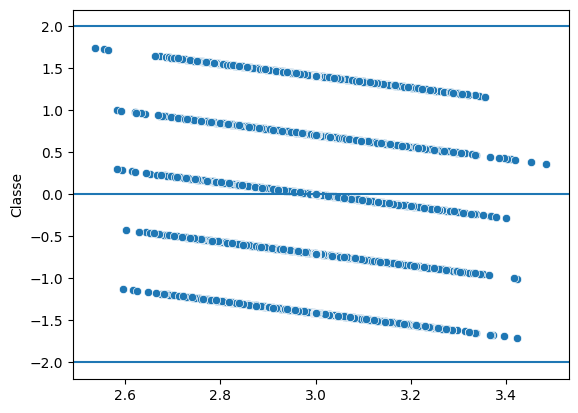

In [32]:
# Verificar linearidade dos residuos: Valores entre -2 e +2 (Escala padrão)
# Verificar homocedasticidade: Valores em torno da reta
sns. scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline (y=-2)
plt.axhline(y=2)

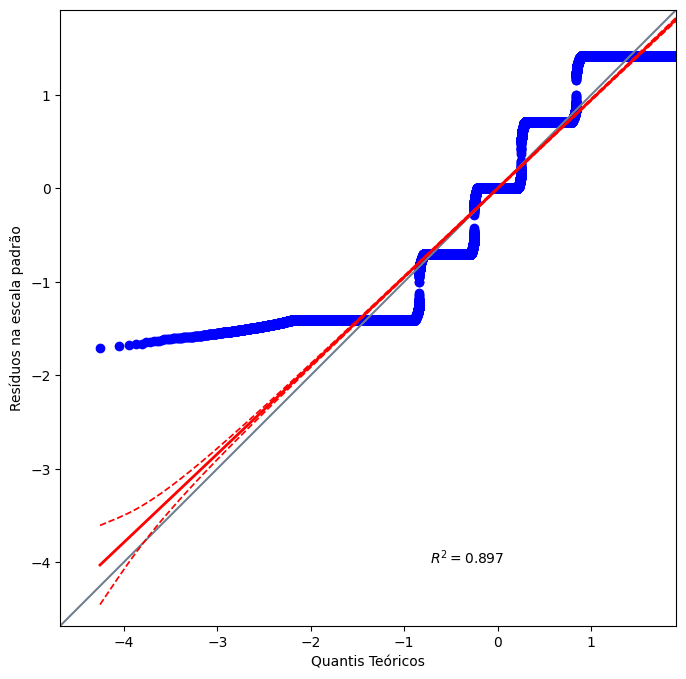

In [37]:
# Checar se resíduos seguem uma distribuição normal
# QQ Plot
import pingouin as pg
plt. figure(figsize=(14,8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95) 
plt.xlabel( 'Quantis Teóricos') 
plt.ylabel( 'Resíduos na escala padrão') 
plt. show ()

In [39]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt
stat_shapiro, P_value_shapiro = shapiro(residuos)
print("Estatistica do Teste: {} e P-Value: {}".format(stat_shapiro, str(P_value_shapiro)))

# Resultado
# Estatistica do Teste: 0.8969916032942163 e P-Value: 4.991107984176095e-104


Estatistica do Teste: 0.8969916032942163 e P-Value: 4.991107984176095e-104


/var/folders/g9/vm2nz5bd1dx9l1b3vcdgkx7w0000gn/T/ipykernel_15142/1591273120.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 66354.
  stat_shapiro, P_value_shapiro = shapiro(residuos)


In [42]:
# Teste de Kolmogorov-Smirnov
stat_ks, P_value_ks = kstest (residuos, 'norm')
print("Estatistica do Teste: {} e P-Value: {}".format(stat_ks, P_value_ks))

# Resultado
# Estatistica do Teste: 0.22867927438123814 e P-Value: 0.0

Estatistica do Teste: 0.22867927438123814 e P-Value: 0.0


In [44]:
# Teste de Lilliefors
Stat_11, P_value_11 = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatistica do Teste: {} e P-Value: {}".format(Stat_11, P_value_11))

# Resultado:
# Estatistica do Teste: 0.1464155144330333 e P-Value: 0.0009999999999998899

Estatistica do Teste: 0.1464155144330333 e P-Value: 0.0009999999999998899


In [45]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[( 'preprocessor', preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

In [46]:
X_test_transformed

array([[-0.60097863, -0.60115101, -0.60072287, ..., -0.60684472,
        -0.60224839, -0.60577734],
       [-0.61063945, -0.60922415, -0.60419852, ..., -0.60183389,
        -0.60347116, -0.6109334 ],
       [ 1.30797186,  1.31076587,  1.31022261, ...,  1.31335489,
         1.30391254,  1.30576559],
       ...,
       [-0.61269736, -0.61033267, -0.60255412, ..., -0.60207413,
        -0.60976146, -0.61870299],
       [-0.60049597, -0.60113669, -0.60174436, ..., -0.60016639,
        -0.59587562, -0.59842263],
       [-0.60226839, -0.60459709, -0.59923282, ..., -0.60885233,
        -0.59843128, -0.59932025]])

In [48]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld [0]
P_value_goldfeld = test_goldfeld [1]
print("Estatistica do Teste: {} e P-Value: {}".format(stat_goldfeld, P_value_goldfeld))

# Resultado
# Estatistica do Teste: 0.9994973991692271 e P-Value: 0.518203878029887

Estatistica do Teste: 0.9994973991692271 e P-Value: 0.518203878029887


# Realizar Predição Individual

In [64]:
predicao_individual = {
    'Classe': 1,
    'ID': 6,
    **{f'{i}': np.random.uniform(-1.0, 1.0) for i in range(200)}
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [65]:
sample_df

,Classe,ID,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
1,1,6,-0.438403,0.30506,0.048727,-0.090036,-0.374436,-0.882575,-0.472914,-0.458965,...,-0.886974,-0.527083,-0.908722,-0.07824,-0.416888,0.126679,0.614332,0.154085,0.819951,0.371


In [66]:
# Predição
model_regr.predict (sample_df)

array([3.00072376])

In [67]:
import joblib

In [69]:
joblib.dump(model_regr, './api/modelo_aprendizagem.pkl')

['./modelo_aprendizagem.pkl']